In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2022/train.csv")

In [3]:
#Set dark theme
plt.style.use('dark_background')
#sns.set_palette(sns.color_palette("Accent"))
# Create an array with the colors you want to use
colors = [  "blueviolet", "deepskyblue","lightyellow", "blueviolet", "slategrey",  "lightpink", "bisque"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.set_style({'axes.grid' : False})

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
def create_EDA_summary (df = None):
    train_import_table = pd.DataFrame()
    train_import_table["dtype"] = train.apply(lambda x: x.dtype)
    train_import_table["NROW"] = train.shape[0]
    train_import_table["Unique_values"] = [ len(train[col].unique()) for col in train.columns]
    train_import_table["Percent_missing"] = (train.isnull().sum()/train.shape[0])*100
    
    return train_import_table

In [6]:
create_EDA_summary(train)

,dtype,NROW,Unique_values,Percent_missing
row_id,int64,26298,26298,0.0
date,object,26298,1461,0.0
country,object,26298,3,0.0
store,object,26298,2,0.0
product,object,26298,3,0.0
num_sold,int64,26298,1377,0.0


In [7]:
#Cast to date_time
train["date"] = pd.to_datetime(train["date"])
train = train.set_index("date")

In [8]:
train.index.min()

Timestamp('2015-01-01 00:00:00')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26298 entries, 2015-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='date'>

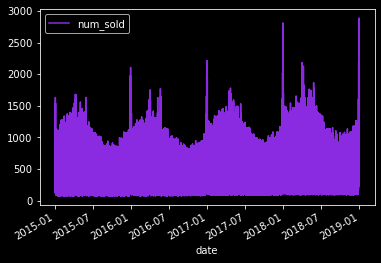

In [10]:
train.plot(y = "num_sold")


In [11]:
train = train.reset_index()



<AxesSubplot:xlabel='date', ylabel='num_sold'>

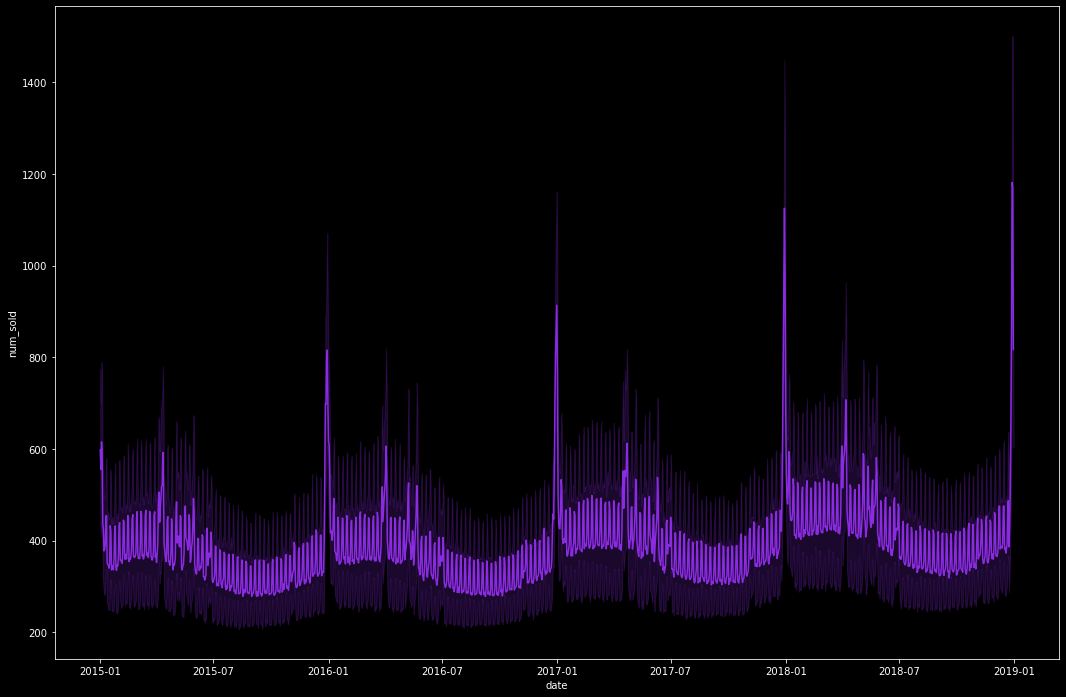

In [12]:
plt.figure(figsize=(18, 12))
sns.lineplot(x = "date", y = "num_sold", data = train)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   row_id    26298 non-null  int64         
 2   country   26298 non-null  object        
 3   store     26298 non-null  object        
 4   product   26298 non-null  object        
 5   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ MB


In [14]:
create_EDA_summary(train)

,dtype,NROW,Unique_values,Percent_missing
date,datetime64[ns],26298,1461,0.0
row_id,int64,26298,26298,0.0
country,object,26298,3,0.0
store,object,26298,2,0.0
product,object,26298,3,0.0
num_sold,int64,26298,1377,0.0


In [15]:
train.groupby(["country", "store", "product"])["num_sold"].sum()

country  store       product       
Finland  KaggleMart  Kaggle Hat         529583
                     Kaggle Mug         298337
                     Kaggle Sticker     150548
         KaggleRama  Kaggle Hat         918862
                     Kaggle Mug         520278
                     Kaggle Sticker     263319
Norway   KaggleMart  Kaggle Hat         868777
                     Kaggle Mug         488515
                     Kaggle Sticker     247753
         KaggleRama  Kaggle Hat        1514119
                     Kaggle Mug         853659
                     Kaggle Sticker     431883
Sweden   KaggleMart  Kaggle Hat         612472
                     Kaggle Mug         344628
                     Kaggle Sticker     174755
         KaggleRama  Kaggle Hat        1068652
                     Kaggle Mug         600870
                     Kaggle Sticker     304348
Name: num_sold, dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   row_id    26298 non-null  int64         
 2   country   26298 non-null  object        
 3   store     26298 non-null  object        
 4   product   26298 non-null  object        
 5   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ MB


In [17]:
train.head(2)

,date,row_id,country,store,product,num_sold
0,2015-01-01,0,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,1,Finland,KaggleMart,Kaggle Hat,520


In [18]:
def create_features(df = None):
    """
    Creates time series features from datetime index
    Requires the index of the dataframe to be a datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear

In [19]:
#Cast to date_time
train["date"] = pd.to_datetime(train["date"])
train = train.set_index("date")
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26298 entries, 2015-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [20]:
create_features(df = train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26298 entries, 2015-01-01 to 2018-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   row_id      26298 non-null  int64         
 1   country     26298 non-null  object        
 2   store       26298 non-null  object        
 3   product     26298 non-null  object        
 4   num_sold    26298 non-null  int64         
 5   date        26298 non-null  datetime64[ns]
 6   hour        26298 non-null  int64         
 7   dayofweek   26298 non-null  int64         
 8   quarter     26298 non-null  int64         
 9   month       26298 non-null  int64         
 10  year        26298 non-null  int64         
 11  dayofyear   26298 non-null  int64         
 12  dayofmonth  26298 non-null  int64         
 13  weekofyear  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(3)
memory usage: 3.0+ MB


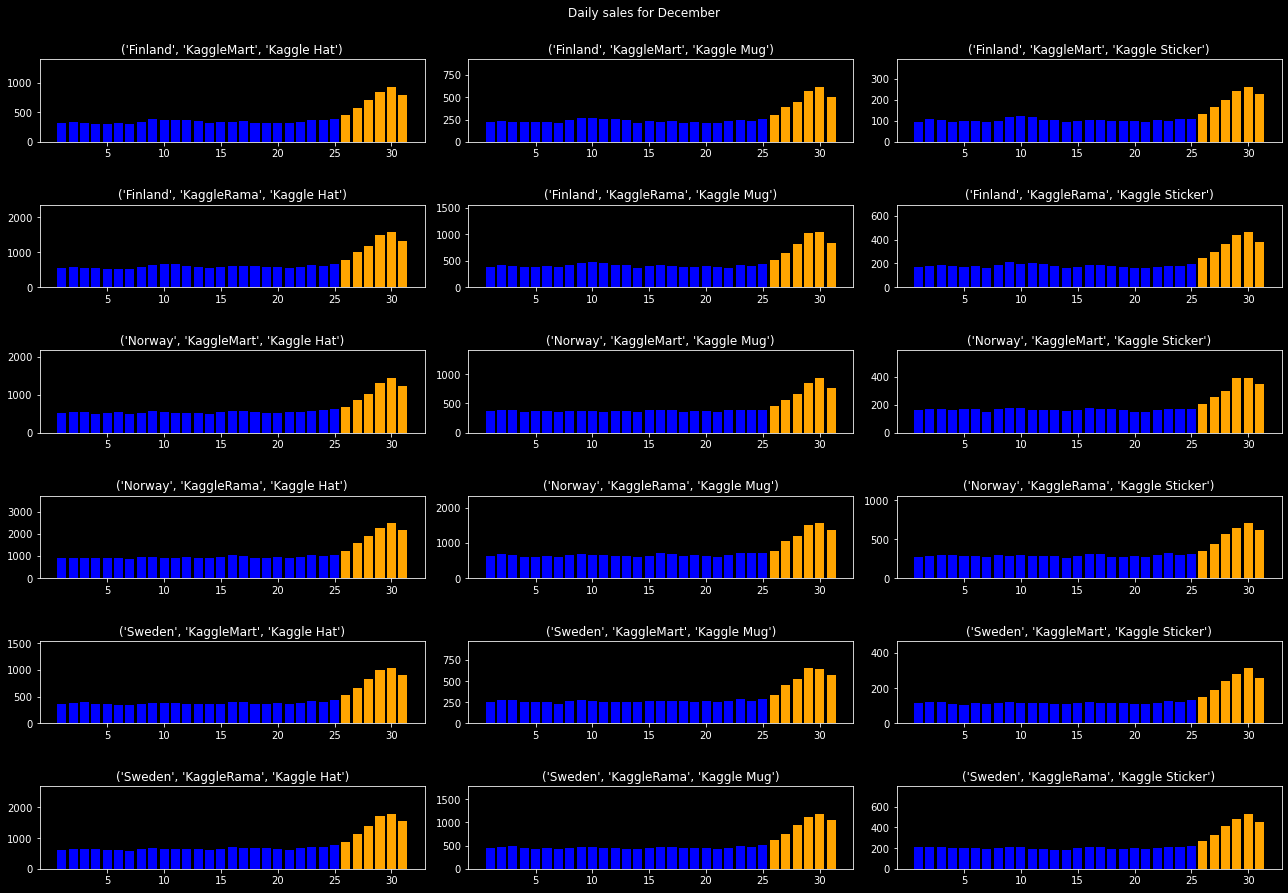

In [22]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.bar(range(1, 32),
           df.num_sold[df.date.dt.month==12].groupby(df.date.dt.day).mean(),
           color=['b'] * 25 + ['orange'] * 6)
    ax.set_title(combi)
    ax.set_xticks(ticks=range(5, 31, 5))
plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for December', y=1.03)
plt.show()

### Trying to create a function with creates lag values with a groupby object

In [23]:
def create_lag_values(df = None, target=None, list_shift = [6, 12, 24]):
    """
    Creates time series features from datetime index
    """
    for i in list_shift:
        df[f"{target}_{i}"] = df[target].shift(i)
        return df
       

In [24]:
create_lag_values(df = train, target = "num_sold")

,row_id,country,store,product,num_sold,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_sold_6
date,,,,,,,,,,,,,,,
2015-01-01,0,Finland,KaggleMart,Kaggle Mug,329,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,1,Finland,KaggleMart,Kaggle Hat,520,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,2,Finland,KaggleMart,Kaggle Sticker,146,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,3,Finland,KaggleRama,Kaggle Mug,572,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,4,Finland,KaggleRama,Kaggle Hat,911,2015-01-01,0,3,1,1,2015,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,26293,Sweden,KaggleMart,Kaggle Hat,823,2018-12-31,0,0,4,12,2018,365,31,1,1124.0
2018-12-31,26294,Sweden,KaggleMart,Kaggle Sticker,250,2018-12-31,0,0,4,12,2018,365,31,1,351.0
2018-12-31,26295,Sweden,KaggleRama,Kaggle Mug,1004,2018-12-31,0,0,4,12,2018,365,31,1,1383.0


In [25]:
train.groupby(['country', 'store', 'product'])["num_sold"].sum()

country  store       product       
Finland  KaggleMart  Kaggle Hat         529583
                     Kaggle Mug         298337
                     Kaggle Sticker     150548
         KaggleRama  Kaggle Hat         918862
                     Kaggle Mug         520278
                     Kaggle Sticker     263319
Norway   KaggleMart  Kaggle Hat         868777
                     Kaggle Mug         488515
                     Kaggle Sticker     247753
         KaggleRama  Kaggle Hat        1514119
                     Kaggle Mug         853659
                     Kaggle Sticker     431883
Sweden   KaggleMart  Kaggle Hat         612472
                     Kaggle Mug         344628
                     Kaggle Sticker     174755
         KaggleRama  Kaggle Hat        1068652
                     Kaggle Mug         600870
                     Kaggle Sticker     304348
Name: num_sold, dtype: int64

In [26]:
list_df = []
for (combi, df) in (train.groupby(['country', 'store', 'product'])):
    temp = create_lag_values(df, "num_sold")
    list_df.append(temp)
   

In [27]:
df_f = pd.concat(list_df)

## Continue with modelling

In [28]:
train

,row_id,country,store,product,num_sold,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,num_sold_6
date,,,,,,,,,,,,,,,
2015-01-01,0,Finland,KaggleMart,Kaggle Mug,329,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,1,Finland,KaggleMart,Kaggle Hat,520,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,2,Finland,KaggleMart,Kaggle Sticker,146,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,3,Finland,KaggleRama,Kaggle Mug,572,2015-01-01,0,3,1,1,2015,1,1,1,NaN
2015-01-01,4,Finland,KaggleRama,Kaggle Hat,911,2015-01-01,0,3,1,1,2015,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,26293,Sweden,KaggleMart,Kaggle Hat,823,2018-12-31,0,0,4,12,2018,365,31,1,1124.0
2018-12-31,26294,Sweden,KaggleMart,Kaggle Sticker,250,2018-12-31,0,0,4,12,2018,365,31,1,351.0
2018-12-31,26295,Sweden,KaggleRama,Kaggle Mug,1004,2018-12-31,0,0,4,12,2018,365,31,1,1383.0


In [29]:
single_ts = train[(train["country"] == "Finland") & (train["store"] == "KaggleMart") & (train["product"] == "Kaggle Mug")]
single_ts = single_ts[["num_sold"]]
single_ts

,num_sold
date,
2015-01-01,329
2015-01-02,318
2015-01-03,360
2015-01-04,332
2015-01-05,243
...,...
2018-12-27,414
2018-12-28,499
2018-12-29,774


<AxesSubplot:xlabel='date'>

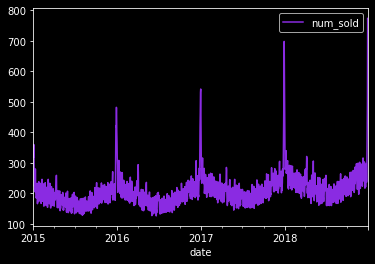

In [50]:
single_ts.plot()

In [30]:
# Check for stationarity of a single country, store and product combination

from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(single_ts["num_sold"])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.2005381767211256
p-value: 0.2060501877356486


In [31]:
# difference the timeseries once
single_ts_diff_1 = np.diff(single_ts["num_sold"], n=1)

In [32]:
#Check for stationarity again
ADF_result = adfuller(single_ts_diff_1)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

#The time series is stationary after differencing once

ADF Statistic: -10.837669162840541
p-value: 1.646212705718201e-19


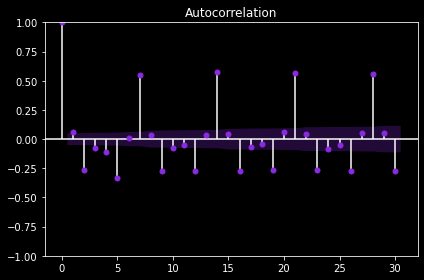

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(single_ts_diff_1, lags=30);
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


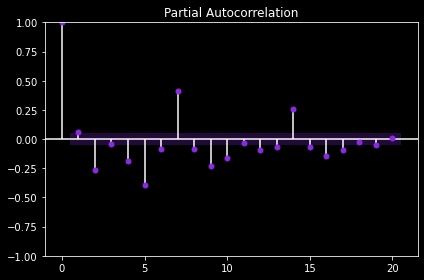

In [35]:
#Look at the partial correlation plot to understand if it is an autoregressive process

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(single_ts_diff_1, lags=20);
plt.tight_layout()

#Based on the partial correlation plot this is not a autorgression-only process and it is an ARMA (p,q)

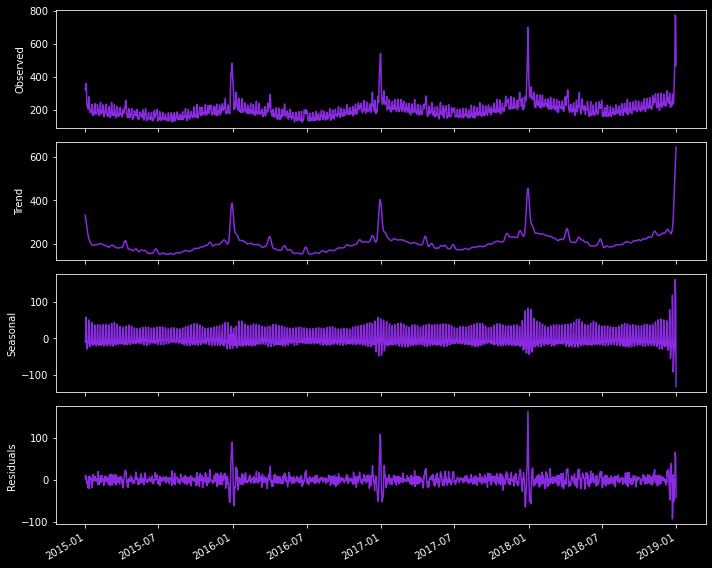

In [51]:
# Decomposition of the time series
#Weekly seasonality
from statsmodels.tsa.seasonal import STL
decomposition = STL(single_ts, period=7).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(10,8))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
fig.autofmt_xdate()
plt.tight_layout()

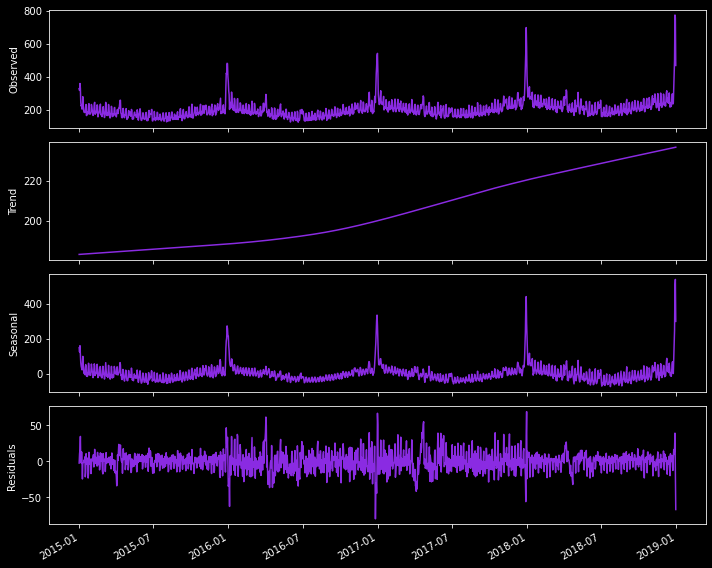

In [52]:
# Decomposition of the time series
#Annual seaonsality

from statsmodels.tsa.seasonal import STL
decomposition = STL(single_ts, period=365).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(10,8))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
# Decomposition of the time series

from statsmodels.tsa.seasonal import STL
decomposition = STL(single_ts, period=).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(10,8))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
fig.autofmt_xdate()
plt.tight_layout()

### Modelling an ARMA (p,q) process

In [42]:
from itertools import product
ps = range(0, 5, 1)
qs = range(0, 5, 1)
#This is an option to create a list of tuples based on the itertools product function
order_list = list(product(ps, qs))
order_list


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [39]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    results = [] # create an emplty list for storage
    for order in tqdm_notebook(order_list): # loop through the different (p,q) options
        try:
    #This model uses 0 for the second parameter
            model = SARIMAX(endog, order=(order[0], 1, order[1]),simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [54]:
result_df = optimize_ARMA(single_ts_diff_1, order_list)
result_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/25 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

,"(p,q)",AIC
0,"(4, 4)",13597.132196
1,"(4, 3)",13606.055455
2,"(2, 4)",13725.227683
3,"(3, 3)",13750.604759
4,"(2, 3)",13757.422918
5,"(3, 4)",13759.351186
6,"(1, 3)",13968.841029
7,"(0, 4)",13975.885306
8,"(2, 2)",13982.939114
9,"(4, 1)",14050.456729


### Modelling a SARIMA model

In [64]:
# Define the parameter
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]
d = 1
D = 0
s = 365

In [67]:
ARIMA_order_list = list(product(ps, qs, Ps, Qs))


In [66]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d:int, D: int, s: int) -> pd.DataFrame:
    results = []
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog,order=(order[0], d, order[1]),seasonal_order=(order[2], D, order[3], s),
                            simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
#Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True)
    return result_df

In [ ]:
ARIMA_result_df = optimize_SARIMA(single_ts, ARIMA_order_list, d, D, s)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/169 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

In [69]:
ARIMA_result_df

,"(p,q,P,Q)",AIC
0,"(12, 7, 0, 0)",12916.436907
1,"(12, 9, 0, 0)",12917.437990
2,"(11, 8, 0, 0)",12918.475351
3,"(12, 10, 0, 0)",12920.064067
4,"(10, 8, 0, 0)",12923.062404
...,...,...
164,"(2, 0, 0, 0)",14099.821674
165,"(1, 1, 0, 0)",14169.721553
166,"(0, 1, 0, 0)",14205.749705
167,"(1, 0, 0, 0)",14211.809462


In [34]:
# create train/test split

